In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import Adam

In [25]:
dtrain = pd.read_csv("fashion-mnist_train.csv")
dtest = pd.read_csv("fashion-mnist_test.csv")

label = dtrain['label'].unique()          #10 label exist

print(len(label))

10


In [26]:
X_train = dtrain.iloc[:,1:] 
Y_train = dtrain.iloc[:,0]               
x_test = dtest.iloc[:,1:]
y_test = dtest.iloc[:,0]






X_train ,x_test = X_train.values.reshape(-1,28,28,1), x_test.values.reshape(-1,28,28,1)     
#reformatting the 784 long array into 28*28 matrix 




X_train = X_train/255.0        #normalizing numbers between 0-1
x_test = x_test/255.0

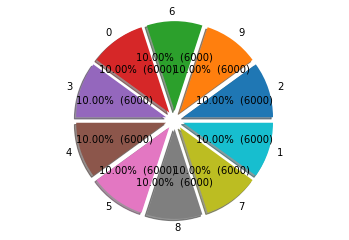

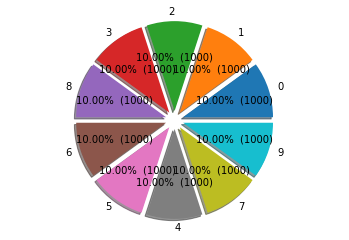

In [27]:
from collections import Counter

def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')
    
y = np.array(Y_train)
y_t = np.array(y_test)
plot_pie(y)
plot_pie(y_t)



In [28]:
Y_train = to_categorical(Y_train, num_classes=len(label))
y_test  = to_categorical(y_test, num_classes=len(label))


In [29]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range= 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1
)

datagen.fit(X_train)


train_generator = datagen.flow(X_train, Y_train, batch_size = 128)

validation_generator = datagen.flow(x_test, y_test, batch_size = 128)

In [30]:
model = Sequential() # Initialize the sequential model

# Add CNN convolutions with BatchNormalization and MaxPooling2D
# Avoid overfitting with Dropout
model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28, 28, 1), padding = 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size= (4,4), padding = 'same', input_shape = (28,28,1), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#creating the model
model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.20))
model.add(Dense(1024, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.35))

model.add(Dense(10,activation='softmax'))


In [31]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(lr = 1e-3),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = X_train.shape[0] // 128,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = x_test.shape[0] // 64,
)

Epoch 1/10
468/468 [==============================] - 41s 88ms/step - loss: 0.6880 - acc: 0.7346 - val_loss: 0.5305 - val_acc: 0.7968
Epoch 2/10
468/468 [==============================] - 42s 89ms/step - loss: 0.4656 - acc: 0.8240 - val_loss: 0.4197 - val_acc: 0.8370
Epoch 3/10
468/468 [==============================] - 42s 89ms/step - loss: 0.3942 - acc: 0.8534 - val_loss: 0.3704 - val_acc: 0.8627
Epoch 4/10
468/468 [==============================] - 42s 89ms/step - loss: 0.3581 - acc: 0.8662 - val_loss: 0.3340 - val_acc: 0.8728
Epoch 5/10
468/468 [==============================] - 42s 89ms/step - loss: 0.3363 - acc: 0.8727 - val_loss: 0.3697 - val_acc: 0.8615
Epoch 6/10
468/468 [==============================] - 42s 90ms/step - loss: 0.3194 - acc: 0.8807 - val_loss: 0.3171 - val_acc: 0.8794
Epoch 7/10
468/468 [==============================] - 43s 91ms/step - loss: 0.3070 - acc: 0.8848 - val_loss: 0.2941 - val_acc: 0.8920
Epoch 8/10
468/468 [==============================] - 42s 89ms